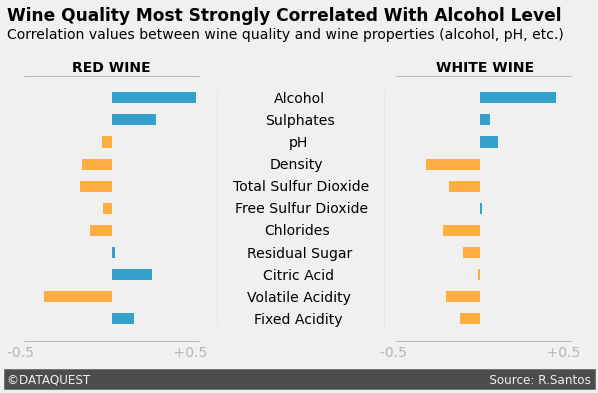

In [1]:
#We want to determine which attributes (pH, alcohol level, etc.) most strongly correlate with wine quality. We will do this by visually representing our data.

import matplotlib.pyplot as plt
import pandas as pd

red_wine = pd.read_csv(r'C:\Users\Mico\OneDrive\Desktop\DATASETS\DATAQUEST\FIVETHIRTYEIGHT\winequality-red.csv', sep=';')
red_corr = red_wine.corr()['quality'][:-1]

white_wine = pd.read_csv(r'C:\Users\Mico\OneDrive\Desktop\DATASETS\DATAQUEST\FIVETHIRTYEIGHT\winequality-white.csv', sep= ';')
white_corr = white_wine.corr()['quality'][:-1]

# Set the style to fivethirtyeight
plt.style.use('fivethirtyeight')

# Create a figure of 1x1 with a size of 9 inches to 5 inches
fig, ax = plt.subplots(figsize=(9, 5))

######################################################################
#Last step, see explanation below
colors = {True: '#33A1C9', False: '#ffae42'} #{Positive, Negative}
#Red wine (left graph)
red = red_corr >=0
color_map_red = red.map(colors)
#White wine (right graph)
white = white_corr >= 0
color_map_white = white.map(colors)

######################################################################

### First step, we are going to create a clear canvass for us to work with ###
# We are going to create to bargraphs in the same plane
ax.barh(white_corr.index, white_corr, height = 0.5,left = 2, color = color_map_white) #see explanation below for color # blue graph, left parameter = (+ int or -int) to move the x axis to the (right or left) of the graph/ In this case we move it to the right, height to 0.5 to make a thinner bar
ax.barh(red_corr.index, red_corr,height = 0.5, left = -0.1, color = color_map_red) #see explanation below for color #red graph, move to the left hence -0.1. To create more space in the middle
ax.grid(b = False) # set [b] parameter to false to remove the grid lines
ax.set_xticklabels([]) # removes the the x label
ax.set_yticklabels([]) # removes the the x label

#RESULT, 2 BAR GRAPH SEPARATED FROM EACH OTHER BY 2 UNTIS OF X AXIS

######################################################################
### Second step, we are going to add structural elements so that the audience can read the graph ###

##### Y TICK FOCUSED #####
# We begin by adding y-tick labels in the center of the graph — both bar plots have the same y-tick labels. Below, we add the labels using Axes.text() and specify the coordinates manually. This can be a bit cumbersome, but it also gives us the precision and flexibility we need.

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71} # The data inside the dict is the starting position of the word in the x coordinates, this is done manually by trial and error
y_coord = 9.8 # starting position (alcohol will start in 9.8-1 = 8.8)
# So for example, for 'Alcohol' word it'll be in (0.82,8.8) coordinate

for y_label, x_coord in x_coords.items(): #x_coord.items ('Alcohol',0.82) (y_label,x_coord)
    ax.text(x_coord, y_coord, y_label) # (x,y,s)
    y_coord -= 1
    
## Next, we visually separate the label from the two bar plot in the middle by adding two vertical lines using axvline.
ax.axvline(0.5, ymin = 0.1, ymax = 0.9,alpha = 0.1, color = 'grey', linewidth = 1) #add vertical line to the left. Ymin and y max for the vertical length of the line
ax.axvline(1.45, ymin = 0.1, ymax = 0.9,alpha = 0.1, color = 'grey', linewidth = 1) #add vertical line to the right

#RESULT, 2 BAR GRAPH LABELED IN THE MIDDLE BY Y TICKS AND VISUALLY SEPARATED BY A VERTICAL LINE

##### X TICK FOCUSED #####
#Above, we focused on adding y-tick labels. Now, we need to add x-tick labels so the audience can read the correlation values

#We bign by adding horizontal line under the two bar graph. We will control the position/length of the horizontal line by using the xmax and xmin paramater in axhline

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32) # adds a horizontal line underneath the left graph. Starts with y coordinate since it is an h line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)# adds a horizontal line underneath the right graph.

#Next, All correlations range between -0.5 and +0.5, and we're going to use these two values as extremes. We're going to add these values as x-tick labels under each horizontal line. Below, note that we also use string concatenation (and ' '*31 means 31 space characters). 31 because in the above axhline the range for both line is 31 eg, (0.98-0.67 = 31)
ax.text(-0.7, -1.7, s = '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5) #Label for left. (x,y,s = -0.5 with 31 spaces in the middle and +0.5 in the end)
ax.text(1.43, -1.7, s = '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5) #Label for right.

#After, we're going to add a title to each bar plot to show which is the plot for red wine and which is the other. To do that, we're going to draw a horizontal line above each plot. Then, we'll write "RED WINE" and "WHITE WINE" respectively above the horizontal lines.

# Adds the line and label to the left
ax.axhline(11, color = 'grey', linewidth = 1, alpha = 0.5, xmin = 0.01, xmax = 0.32)
ax.text(-0.33, 11.2, s = 'RED WINE', weight = 'bold') 
# Adds the line and label to the left
ax.axhline(11, color ='grey', linewidth = 1, alpha = 0.5, xmin = 0.67, xmax = 0.98)
ax.text(1.75,11.2,s = 'WHITE WINE', weight = 'bold') 

# FINAL RESULT OF STEP 2, 2 BAR GRAPH LABELED IN THE MIDDLE BY Y TICKS AND VISUALLY SEPARATED BY A VERTICAL LINE, HORIZONTAL LINE ON THE TOP AND BOTTOM USIG AXHLINE, BOTTOM LINE HAS A NUMERICAL LABEL AND TOP LINE HAS TEXT LABEL

######################################################################
### Third step, adding more details to the graph ###

##### SIGNATURE BAR (SOURCE) #####
#FiveThirtyEight graphs generally have a signature bar at the bottom, where we see the creator's name and the data source.
ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*103 + 'Source: R.Santos',# if we didn't include the whitespace times 94, the text will be cramped up on one side
        color = '#f0f0f0', # this is the color of the text, same as background color of graph
        backgroundcolor = '#4d4d4d', # background color of text (looklike like the text is on top of an axhline) (Enclosure for text)
        size=12)
#Note that we perceive the creator's name and the data source as grouped together. They are part of the same group (part of the signature) thanks to the enclosure we create with the dark grey rectangle(backgroundcolor).

#Next, we will add title and sub title to our graph.
# To maximize data-ink, We'll use the title to show data. We'll use the subtitle to explain the numerical values.
ax.text(-0.7,13.5,'Wine Quality Most Strongly Correlated With Alcohol Level', weight = 'bold', size = 17) #title
ax.text(-0.7,12.7,'Correlation values between wine quality and wine properties (alcohol, pH, etc.)') # subtitle, default fontsize

#RESULT, SIGNATURE BELOW TOGETHER WITH A TITLE AND SUBTITLE

######################################################################
### Last step, change bar colors to represent the values ###
# Positive correlation values will take the color #33A1C9 (a tint of blue).
# Negative correlation values will take the color #ffae42 (a tint of orange).
# To make this change, we'll use the color parameter of Axes.barh(). So far, we've only used strings with this parameter: 'blue', 'red', '#af0b1e', etc.
# The color parameter, however, can also take in an array of strings, where each string represents a color. note that Matplotlib preserves the order of colors in the list:
# For our data, it can get cumbersome to manually add the color code for each correlation value. We're going to simplify this using pandas — below are the steps for the white wine data set:
##1. We calculate the correlations between quality and the other columns. 
##2. We create a Boolean vector where zero and positive correlation values are mapped to True, and negative values are mapped to False. 
##3.  We map each Boolean value to a string representing a color code: True to '#33A1C9', and False to '#ffae42'.
##4. We assign this boolean array to the color parameter in ax.barh()
## Steps below:
###1. white_corr = white_wine.corr()['quality'][:-1] 
###2. positive_white = white_corr >= 0 #boolean array
###3. color_map_white = positive_white.map({True:'#33A1C9',
###                                      False:'#ffae42'})
###4. ax.barh(white_corr.index, white_corr, height = 0.5,left = 2, color = color_map_white)

plt.show()